### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns
import pandas_profiling

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

from yellowbrick.classifier import ClassificationReport, ROCAUC

plt.style.use('ggplot')
pd.options.display.float_format = '{:,.2f}'.format
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [27]:
import string

In [3]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [17]:
#!pip install xlrd
#!pip install openpyxl

Using legacy 'setup.py install' for et-xmlfile, since package 'wheel' is not installed.
    Running setup.py install for et-xmlfile: started
    Running setup.py install for et-xmlfile: finished with status 'done'


You should consider upgrading via the 'c:\users\administrator\appdata\local\programs\python\python36\python.exe -m pip install --upgrade pip' command.


In [12]:
import os
os.listdir('data')

['input.xlsx', 'output.xlsx', 'ros_bag_data.bag']

In [42]:
import xlrd
df_in=pd.read_excel('data/input.xlsx',engine='openpyxl', header=None)
df_out=pd.read_excel('data/output.xlsx', engine='openpyxl',header=None)

In [43]:
df_in.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,4.39,4.60,0.14,18.60,3.78,342.29,56.62,3.52,19.84,20.14,...,0.19,19.95,3.88,934.90,636.41,4.89,19.53,18.11,1.47,73.67
1,4.02,5.16,0.50,16.31,2.51,186.37,947.34,3.39,18.56,20.16,...,0.76,14.98,3.14,593.65,85.34,3.98,21.11,18.54,2.26,83.41
2,4.19,5.37,0.15,18.65,2.76,281.59,543.41,3.44,21.68,19.43,...,0.81,17.78,3.81,664.12,547.28,2.72,18.39,21.32,1.57,60.68
3,4.11,4.68,0.69,19.84,2.49,853.99,901.33,6.03,21.01,19.04,...,0.78,16.84,4.48,929.19,24.25,5.37,19.86,20.36,0.67,85.01
4,4.12,4.72,0.34,17.29,2.50,915.86,670.69,5.71,18.73,18.56,...,0.38,14.14,2.06,506.78,787.17,5.57,21.74,21.18,2.96,35.75


In [44]:
df_out.head()

,0,1,2,3
0,0.00,0.00,0.00,0.00
1,18.64,61.73,1.04,28.95
2,25.44,82.24,1.07,28.97
3,4.95,32.32,1.02,15.06
4,4.64,24.78,1.02,18.28


### Adding random colum names

In [46]:
df_in.shape

(21920, 23)

In [47]:
list(string.ascii_uppercase)[:df_in.shape[1]]

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W']

In [48]:
df_in.columns=list(string.ascii_uppercase)[:df_in.shape[1]]

In [40]:
df_in.head()

,A,B,C,D,E,F,G,H,I,J,...,N,O,P,Q,R,S,T,U,V,W
0,4.39,4.60,0.14,18.60,3.78,342.29,56.62,3.52,19.84,20.14,...,0.19,19.95,3.88,934.90,636.41,4.89,19.53,18.11,1.47,73.67
1,4.02,5.16,0.50,16.31,2.51,186.37,947.34,3.39,18.56,20.16,...,0.76,14.98,3.14,593.65,85.34,3.98,21.11,18.54,2.26,83.41
2,4.19,5.37,0.15,18.65,2.76,281.59,543.41,3.44,21.68,19.43,...,0.81,17.78,3.81,664.12,547.28,2.72,18.39,21.32,1.57,60.68
3,4.11,4.68,0.69,19.84,2.49,853.99,901.33,6.03,21.01,19.04,...,0.78,16.84,4.48,929.19,24.25,5.37,19.86,20.36,0.67,85.01
4,4.12,4.72,0.34,17.29,2.50,915.86,670.69,5.71,18.73,18.56,...,0.38,14.14,2.06,506.78,787.17,5.57,21.74,21.18,2.96,35.75


In [51]:
df_out.shape

(21920, 4)

In [49]:
df_out.columns=['out1','out2','out3','out4']

In [50]:
df_out.head()

,out1,out2,out3,out4
0,0.00,0.00,0.00,0.00
1,18.64,61.73,1.04,28.95
2,25.44,82.24,1.07,28.97
3,4.95,32.32,1.02,15.06
4,4.64,24.78,1.02,18.28


### Appending input and output

In [52]:
df=df_in.append(df_out)

In [53]:
df.head()

,A,B,C,D,E,F,G,H,I,J,...,R,S,T,U,V,W,out1,out2,out3,out4
0,4.39,4.60,0.14,18.60,3.78,342.29,56.62,3.52,19.84,20.14,...,636.41,4.89,19.53,18.11,1.47,73.67,nan,nan,nan,nan
1,4.02,5.16,0.50,16.31,2.51,186.37,947.34,3.39,18.56,20.16,...,85.34,3.98,21.11,18.54,2.26,83.41,nan,nan,nan,nan
2,4.19,5.37,0.15,18.65,2.76,281.59,543.41,3.44,21.68,19.43,...,547.28,2.72,18.39,21.32,1.57,60.68,nan,nan,nan,nan
3,4.11,4.68,0.69,19.84,2.49,853.99,901.33,6.03,21.01,19.04,...,24.25,5.37,19.86,20.36,0.67,85.01,nan,nan,nan,nan
4,4.12,4.72,0.34,17.29,2.50,915.86,670.69,5.71,18.73,18.56,...,787.17,5.57,21.74,21.18,2.96,35.75,nan,nan,nan,nan


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43840 entries, 0 to 21919
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       21920 non-null  float64
 1   B       21920 non-null  float64
 2   C       21920 non-null  float64
 3   D       21920 non-null  float64
 4   E       21920 non-null  float64
 5   F       21920 non-null  float64
 6   G       21920 non-null  float64
 7   H       21920 non-null  float64
 8   I       21920 non-null  float64
 9   J       21920 non-null  float64
 10  K       21920 non-null  float64
 11  L       21920 non-null  float64
 12  M       21920 non-null  float64
 13  N       21920 non-null  float64
 14  O       21920 non-null  float64
 15  P       21920 non-null  float64
 16  Q       21920 non-null  float64
 17  R       21920 non-null  float64
 18  S       21920 non-null  float64
 19  T       21920 non-null  float64
 20  U       21920 non-null  float64
 21  V       21920 non-null  float64
 22

- All are float values
- there is no null values

In [55]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
A,"21,920.00",4.30,0.23,3.90,4.10,4.30,4.50,4.70
B,"21,920.00",4.90,0.29,4.40,4.66,4.90,5.15,5.40
C,"21,920.00",0.50,0.29,0.00,0.25,0.50,0.75,1.00
D,"21,920.00",16.98,1.73,14.00,15.48,16.97,18.46,20.00
E,"21,920.00",3.24,1.01,1.50,2.36,3.23,4.11,5.00
F,"21,920.00",497.89,287.62,0.02,250.10,499.00,744.63,999.94
G,"21,920.00",502.90,288.26,0.13,254.59,504.84,752.80,999.99
H,"21,920.00",3.98,1.73,1.00,2.47,3.97,5.49,7.00
I,"21,920.00",19.99,1.16,18.00,18.98,20.00,20.98,22.00
J,"21,920.00",20.00,1.16,18.00,19.01,20.00,21.00,22.00


- data is not skewed. Mean and median are very similiar for each column

A


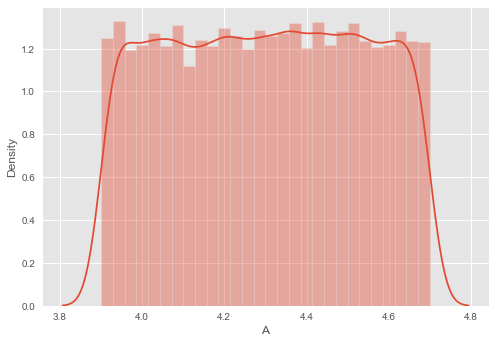

B


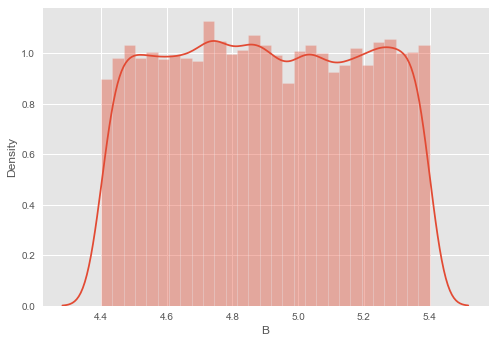

C


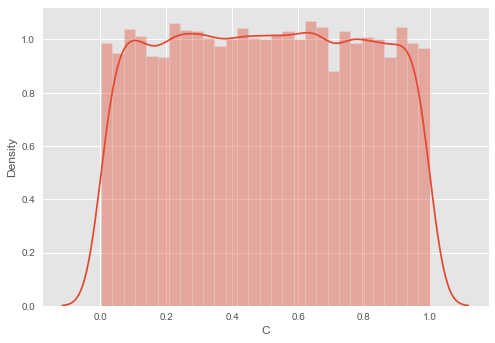

D


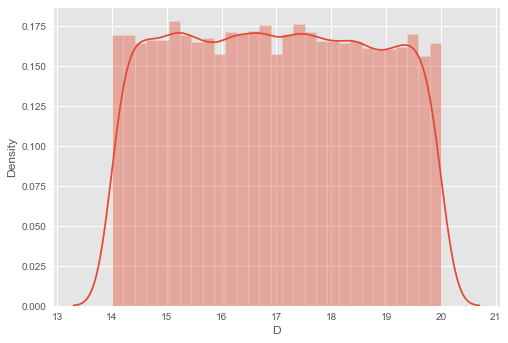

E


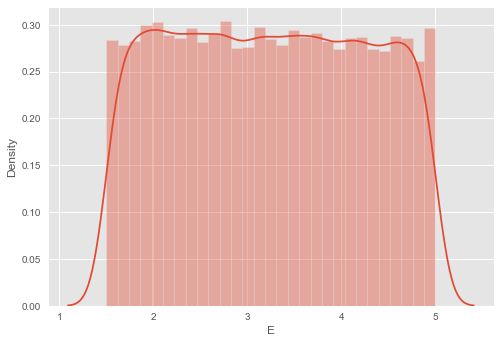

F


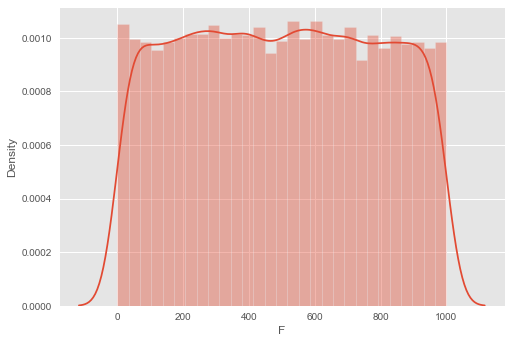

G


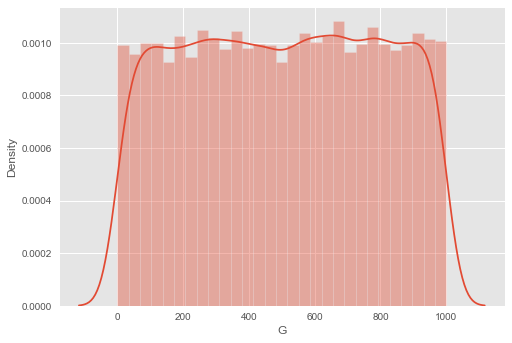

H


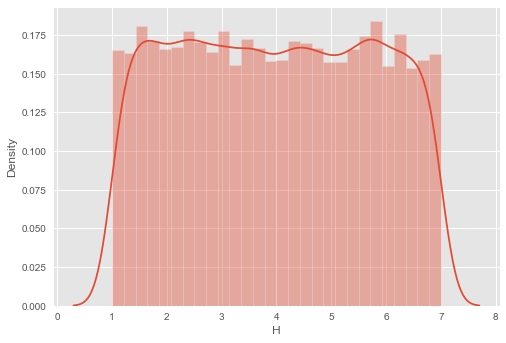

I


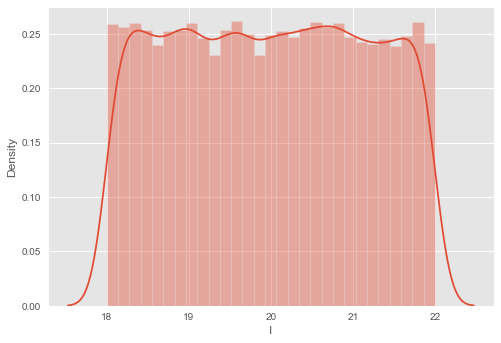

J


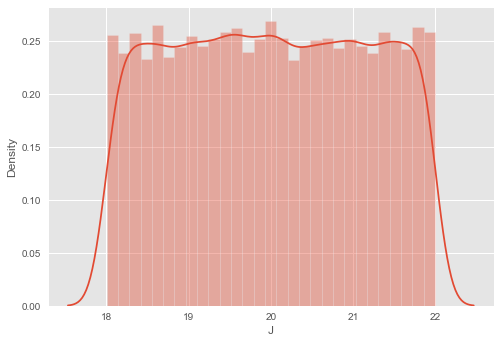

K


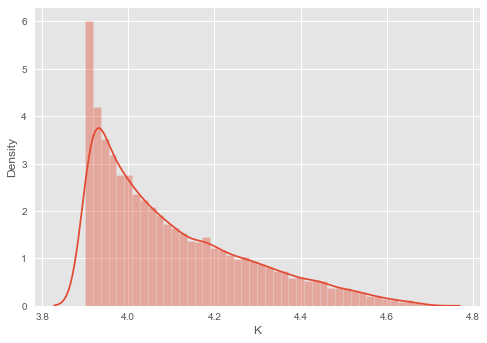

L


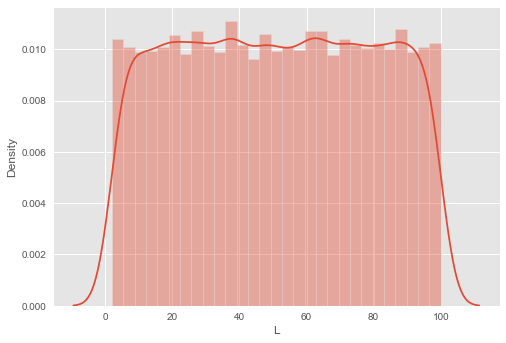

M


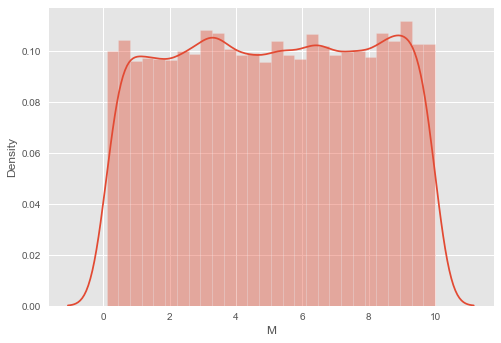

N


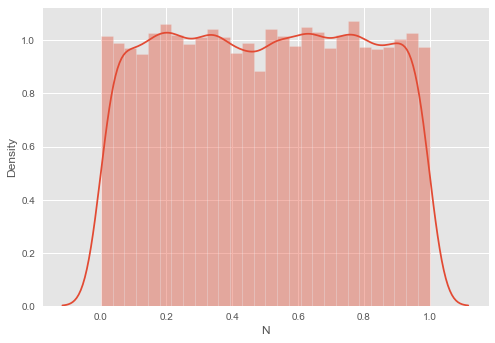

O


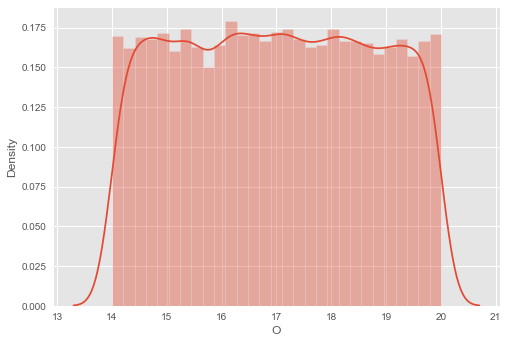

P


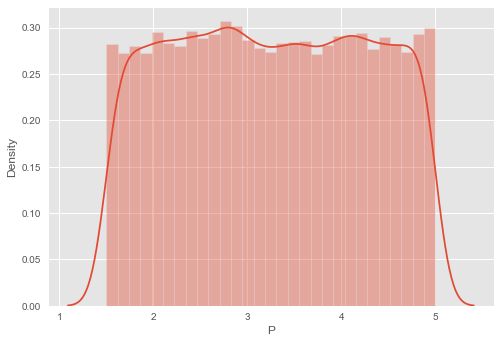

Q


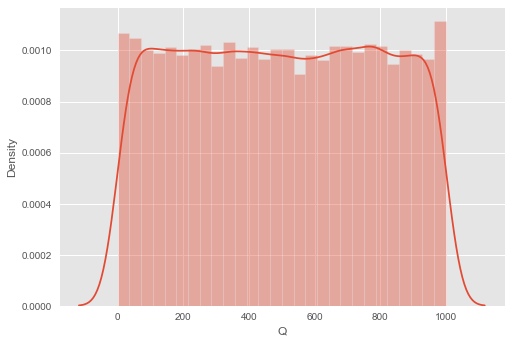

R


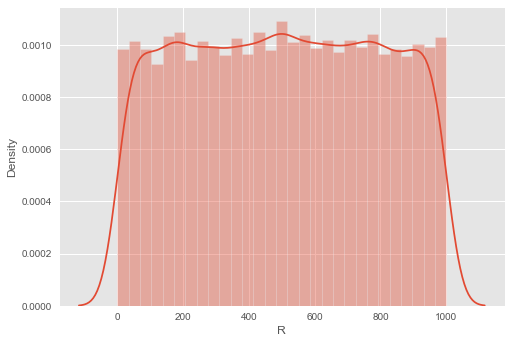

S


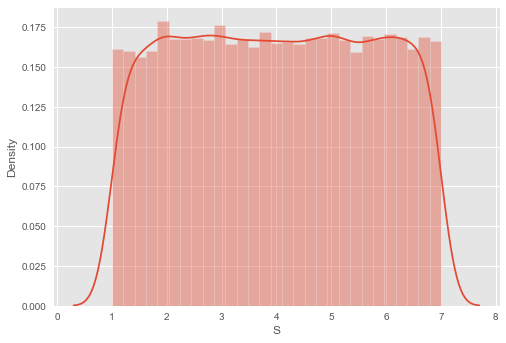

T


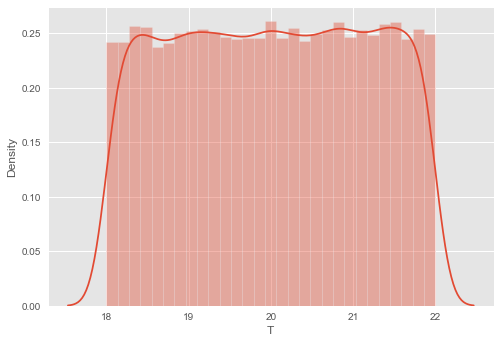

U


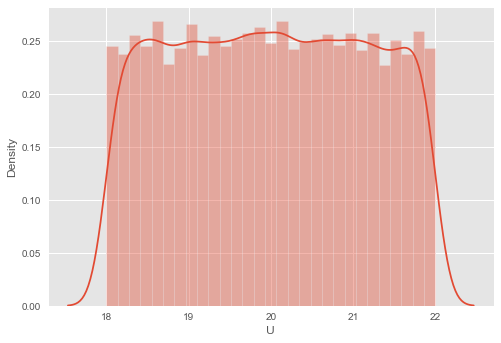

V


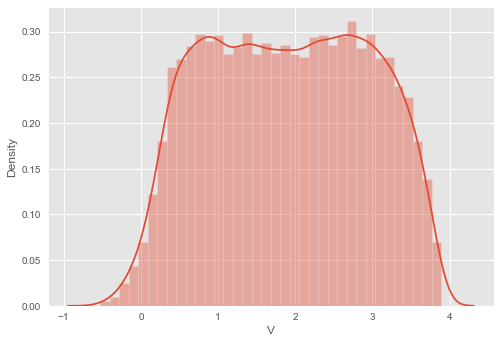

W


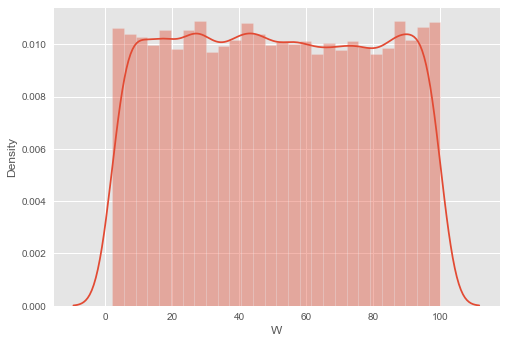

out1


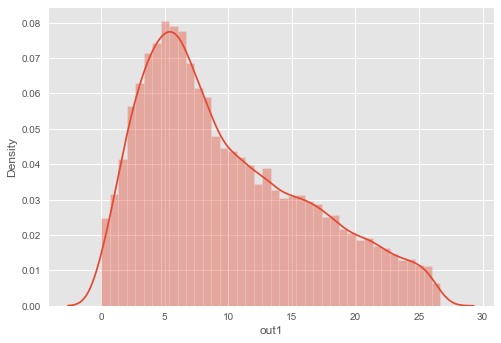

out2


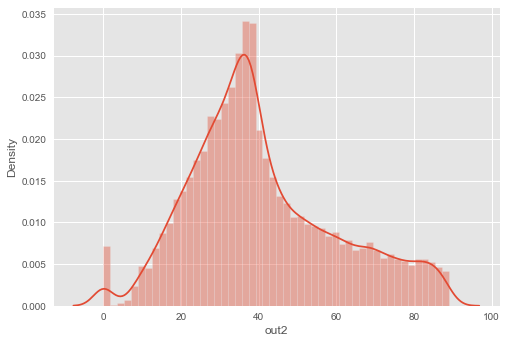

out3


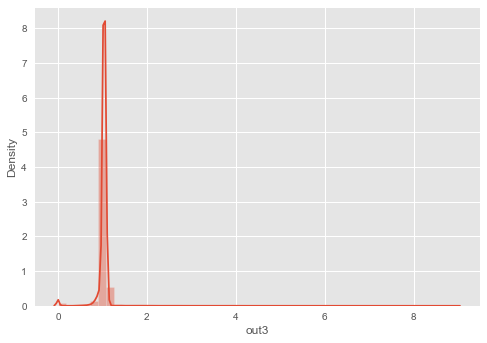

out4


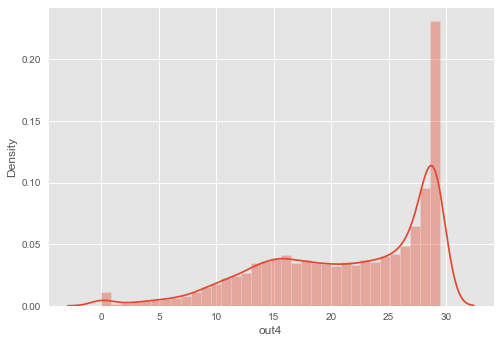

In [58]:
for i in df.columns:
    print(i)
    sns.distplot(df[i])
    plt.show()

<AxesSubplot:>

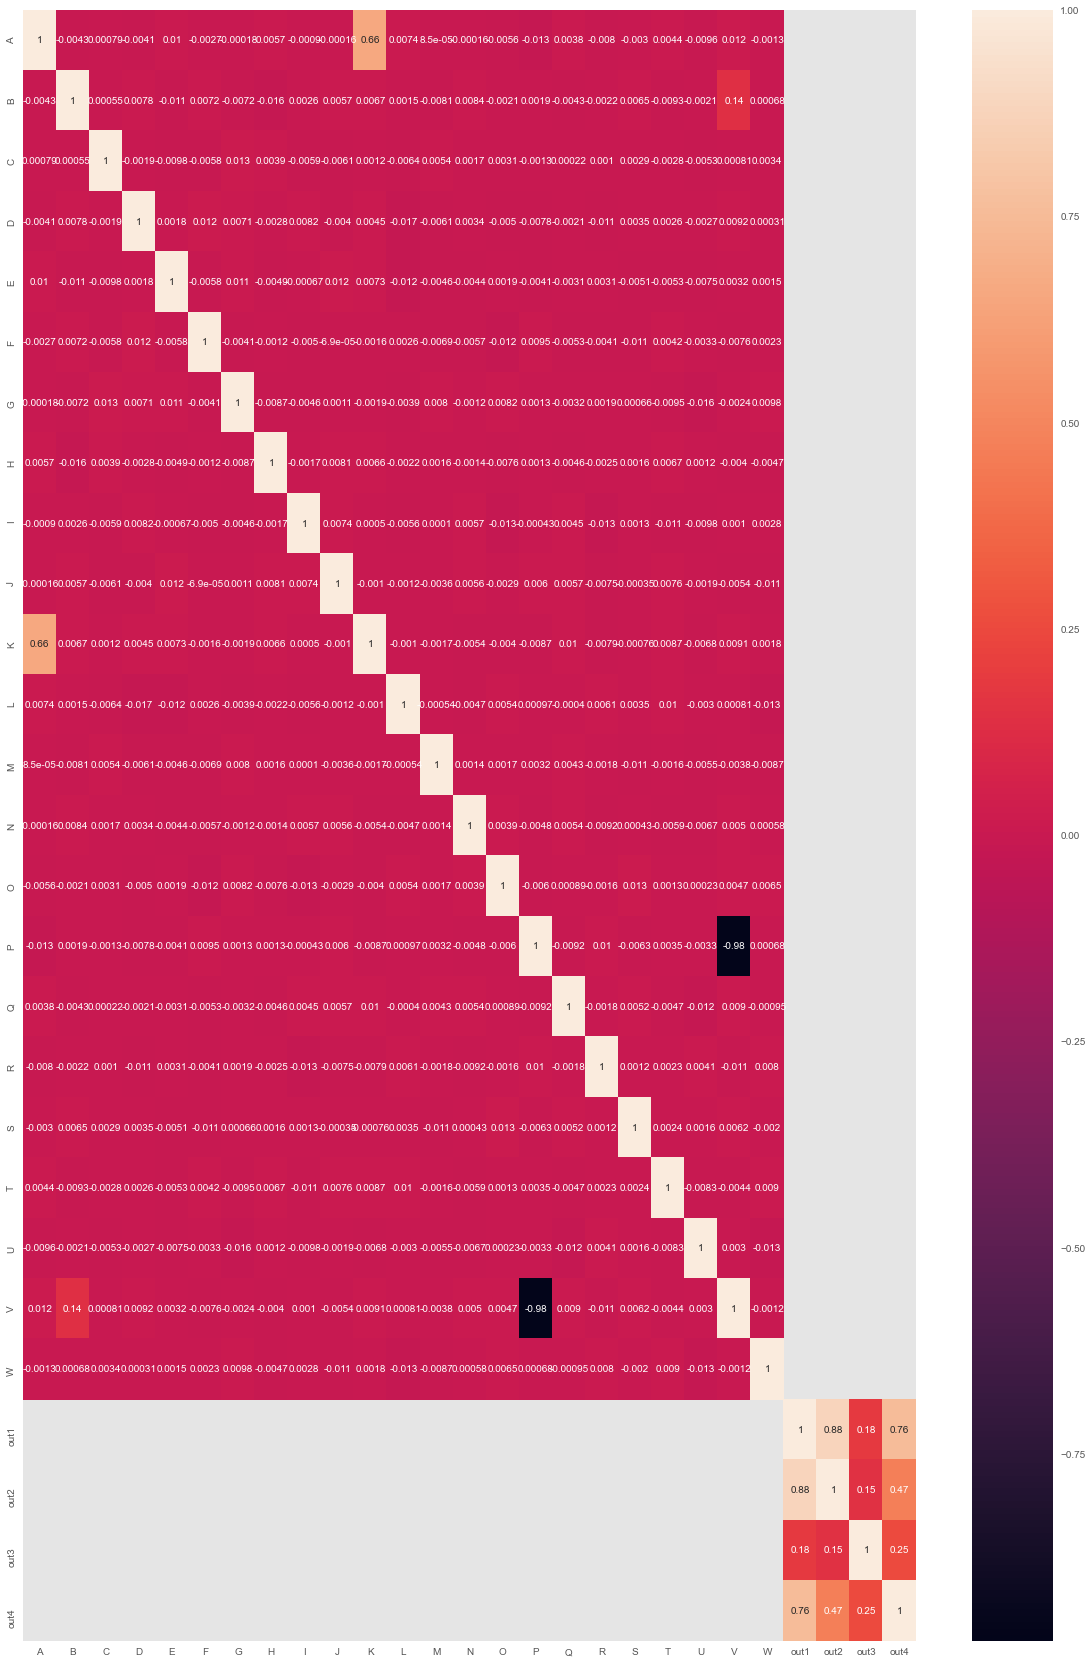

In [60]:
plt.figure(figsize=[20,30])
sns.heatmap(df.corr(),annot=True)

- A, K are correlated
- P and V are highly negatively correlated
- Columns should be independent to each other before applying ML algorithms. For taht we need to either drop columns or we have to do dimensinality reduction
- As we don't the real column names, I prefer dimensionality reduction techniques

In [107]:
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_in, df_out, test_size = .30, random_state=0)

In [77]:
pipe_lr = Pipeline([('scl', StandardScaler()), ('pca', PCA(n_components=23)), ('clf', LinearRegression())]) 
pipe_lr.fit(X_train, y_train) 
#print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))
y_pred = pipe_lr.predict(X_test)
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.3244151863310822
Mean Squared Error: 35.761560759973015
Root Mean Squared Error: 5.980097052721888


In [93]:
for i in range(4):
    #print('Mean Absolute Error:', metrics.mean_absolute_error(y_test.iloc[:,i], y_pred[:,i]))
    #print('Mean Squared Error:', metrics.mean_squared_error(y_test.iloc[:,i], y_pred[:,i]))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test.iloc[:,i], y_pred[:,i])))

Root Mean Squared Error: 3.2094866372367403
Root Mean Squared Error: 10.38131292786422
Root Mean Squared Error: 0.2037104505473943
Root Mean Squared Error: 4.993223659259409


### Decision Tree

In [103]:
pipe_DT = Pipeline([('scl', StandardScaler()), ('pca', PCA(n_components=22)), ('clf', DecisionTreeRegressor())]) 
param_grid_DT = {'clf__max_depth':list(range(3,10)),'clf__min_samples_leaf':list(range(1,5))} 
grid_DT = GridSearchCV( pipe_DT , param_grid = param_grid_DT, cv = 5) 
grid_DT.fit( X_train, y_train) 
print(" Best parameters: ", grid_DT.best_params_) 

 Best parameters:  {'clf__max_depth': 7, 'clf__min_samples_leaf': 4}


In [105]:
y_pred_grid_DT = grid_DT.predict(X_test)
for i in range(4):
    #print('Mean Absolute Error:', metrics.mean_absolute_error(y_test.iloc[:,i], y_pred[:,i]))
    #print('Mean Squared Error:', metrics.mean_squared_error(y_test.iloc[:,i], y_pred[:,i]))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test.iloc[:,i], y_pred_grid_DT[:,i])))

Root Mean Squared Error: 5.202662872330834
Root Mean Squared Error: 15.360516694156969
Root Mean Squared Error: 0.2059899821817601
Root Mean Squared Error: 6.4892499134378525


- RMSE has increased

### Random Forest

In [120]:
pipe_RF = Pipeline([('scl', StandardScaler()), ('pca', PCA(n_components=22)), ('clf', RandomForestRegressor())]) 
param_grid_RF = {'clf__n_estimators':list(range(50,100,20)),'clf__max_depth':[5,7,8],'clf__min_samples_leaf':[2,4,6]} 
grid_RF = GridSearchCV( pipe_RF , param_grid = param_grid_RF, cv = 5) 
grid_RF.fit( X_train, y_train) 
print(" Best parameters: ", grid_RF.best_params_) 

 Best parameters:  {'clf__max_depth': 8, 'clf__min_samples_leaf': 4, 'clf__n_estimators': 90}


In [121]:
y_pred_grid_RF = grid_RF.predict(X_test)

for i in range(4):
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test.iloc[:,i], y_pred_grid_RF[:,i])))

Root Mean Squared Error: 4.451128547769019
Root Mean Squared Error: 13.24977684444866
Root Mean Squared Error: 0.2053334674288918
Root Mean Squared Error: 5.936622423202202


In [119]:
y_pred_grid_RF = grid_RF.predict(X_test)

for i in range(4):
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test.iloc[:,i], y_pred_grid_RF[:,i])))

Root Mean Squared Error: 4.637752381463072
Root Mean Squared Error: 13.771301266875277
Root Mean Squared Error: 0.20542964929678867
Root Mean Squared Error: 6.078620637381661


### Conclusion
- Out of linear regression,decision tree, random forest MSE is less for linear regression. 
- As we have seen there is a high correlation between 2 variable, pca has also reduced one component. We have observed it while doing the grid search  cross validation.
- I have tried neural networks also for solving this problem and it seems to be the best method for this data. Please see the 3_neural networks.ipynb for it